<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
boston_df.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Task 2

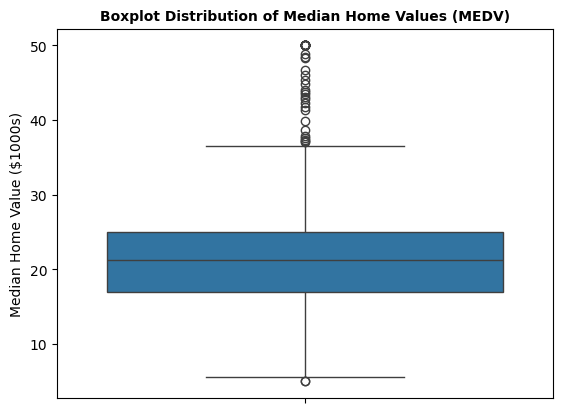

In [7]:
#For the "Median value of owner-occupied homes" provide a boxplot
# Create the boxplot for the MEDV column
sns.boxplot(data=boston_df, y='MEDV')

# Add labels and title
plot_title = 'Boxplot Distribution of Median Home Values (MEDV)'
y_label = 'Median Home Value ($1000s)'
pyplot.title(plot_title, fontsize=10, fontweight='bold')
pyplot.ylabel(y_label, fontsize=10)

# Show the plot
pyplot.show()

**Visual Analysis:** Distribution of Median Home Values (MEDV) shows some outliers in higher price ranges


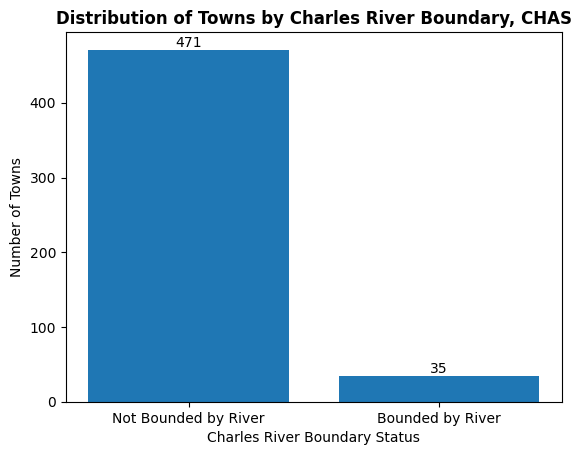

In [8]:
# Provide a  bar plot for the Charles river variable, CHAS
categories = ['Not Bounded by River', 'Bounded by River']
values = boston_df['CHAS'].value_counts()

fig, ax = pyplot.subplots()
bars = ax.bar(categories, values)
plot_title = 'Distribution of Towns by Charles River Boundary, CHAS'
x_label = 'Charles River Boundary Status'
y_label = 'Number of Towns'
pyplot.title(plot_title, fontsize=12, fontweight='bold')
pyplot.xlabel(x_label)
pyplot.ylabel(y_label)
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
        height,                             # Y position (top of bar)
        str(height),                        # The label text
        ha="center", va="bottom"            # Alignment
    )
# Show the plot
pyplot.show()

**Visual Analysis:** It is clear that Most towns are not bounded by the Charles River


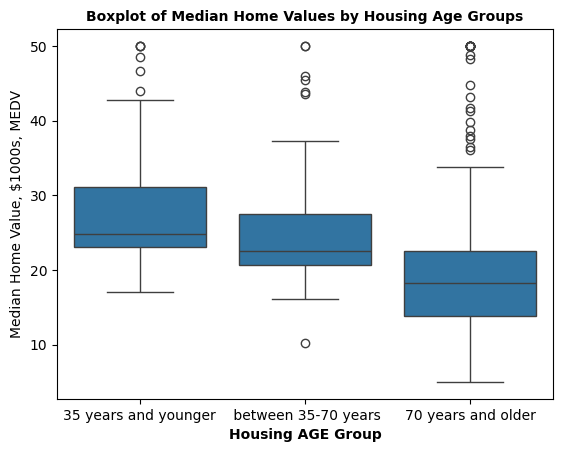

In [9]:
# Provide a boxplot for the MEDV variable vs the AGE variable.
# Discretize the AGE column into three groups
bins = [0, 35, 70, float('inf')]
labels = ['35 years and younger', ' between 35-70 years', '70 years and older']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

# Create the boxplot
sns.boxplot(data=boston_df, x='AGE_group', y='MEDV')

# Add labels and title
plot_title = 'Boxplot of Median Home Values by Housing Age Groups'
x_label = 'Housing AGE Group'
y_label = 'Median Home Value, $1000s, MEDV'
pyplot.title(plot_title, fontsize=10, fontweight='bold')
pyplot.xlabel(x_label, fontsize=10, fontweight='bold')
pyplot.ylabel(y_label)

# Show the plot
pyplot.show()

**Visual Analysis:** The boxplot by housing ages shows that housing age affects property values, with patterns visible across age groups, with some outliers.


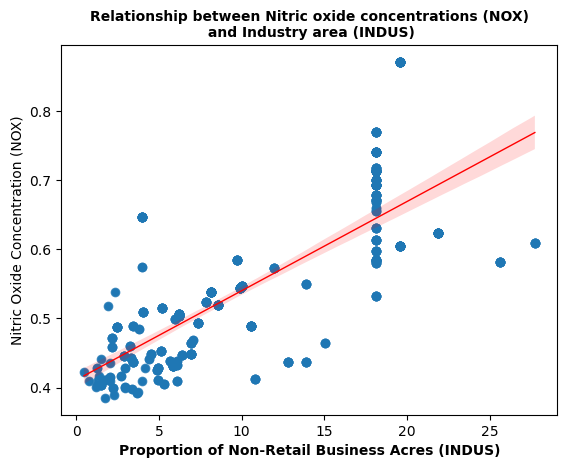

In [10]:
# Provide a scatter plot to show the relationship between 
# Nitric oxide concentrations and the proportion of non-retail business acres per town.
# Create the scatter plot
sns.scatterplot(data=boston_df, x='INDUS', y='NOX')

sns.regplot(x=boston_df['INDUS'], y=boston_df['NOX'], line_kws={"color":"red", "linewidth": 1})
# Add labels and title
plot_title = 'Relationship between Nitric oxide concentrations (NOX)\n and Industry area (INDUS)'
x_label = 'Proportion of Non-Retail Business Acres (INDUS)'
y_label = 'Nitric Oxide Concentration (NOX)'
pyplot.title(plot_title, fontsize=10, fontweight='bold')
pyplot.xlabel(x_label, fontsize=10, fontweight='bold')
pyplot.ylabel(y_label, fontsize=10)

# Show the plot
pyplot.show()

**Visual Analysis:** We can see strong positive correlation between industrial activity and air pollution


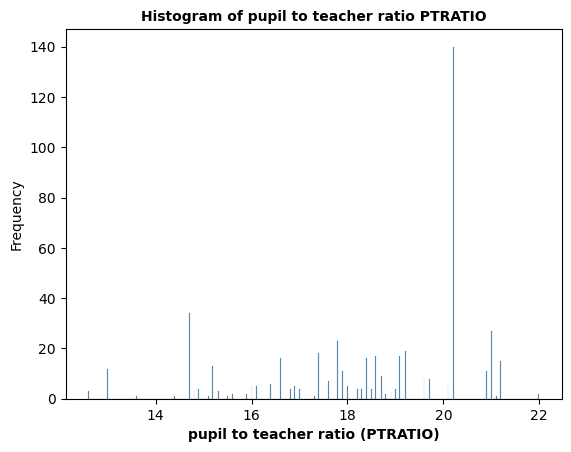

In [11]:
# Create a histogram for the pupil to teacher ratio variable

# Create the histogram
sns.histplot(data=boston_df, x='PTRATIO', bins=len(boston_df), kde=False)

# Add labels and title
plot_title = 'Histogram of pupil to teacher ratio PTRATIO'
x_label = 'pupil to teacher ratio (PTRATIO)'
y_label = 'Frequency'
pyplot.title(plot_title, fontsize=10, fontweight='bold')
pyplot.xlabel(x_label, fontsize=10, fontweight='bold')
pyplot.ylabel(y_label)

# Show the plot
pyplot.show()

**Visual Analysis:** Pupil-teacher ratios show a roughly normal distribution, with an extreme exception


# Task 3

In [12]:
# To answer the first question
# Is there a significant difference in median value of houses bounded by the Charles river or not?
# (T-test for independent samples)
# Null Hypothesis (H₀): There is no significant difference in the median value of houses (MEDV)
#    bounded by the Charles River (CHAS=1) and those not bounded by the river (CHAS=0).
# Alternative Hypothesis (H₁): There is a significant difference in the median value of houses (MEDV)
#    based on whether they are bounded by the Charles River.

alpha = 0.05
# Split the data into two groups based on CHAS
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform an independent t-test
# Assume unequal variances
t_stat, p_value = scipy.stats.ttest_ind(chas_1, chas_0, equal_var=False) 

# Print results
print(f"T-statistic: {t_stat}, P-value: {p_value}\n")

# Conclusion
if p_value < alpha:
    print("Conclusion from the test:\nReject the null hypothesis. There is a significant difference in median value of houses bounded by the Charles River.")
else:
    print("Conclusion from the test:\nFail to reject the null hypothesis. There is no significant difference in median value of houses bounded by the Charles River.")

T-statistic: 3.113291312794837, P-value: 0.003567170098137517

Conclusion from the test:
Reject the null hypothesis. There is a significant difference in median value of houses bounded by the Charles River.


**Results of T-Test statistical analysis:** Significant difference in home values based on Charles River proximity

In [13]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units
# built prior to 1940 (AGE)? (ANOVA)
# Null Hypothesis (H₀): There is no significant difference in the median value of houses (MEDV)
#    across different age groups.
# Alternative Hypothesis (H₁): There is a significant difference in the median value of houses (MEDV)
#    across different age groups.

# Discretize AGE into three groups
bins = [0, 35, 70, float('inf')]
labels = ['35 years and younger', '35-70 years', '70 years and older']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

# Group MEDV by AGE_group
group1 = boston_df[boston_df['AGE_group'] == '35 years and younger']['MEDV']
group2 = boston_df[boston_df['AGE_group'] == '35-70 years']['MEDV']
group3 = boston_df[boston_df['AGE_group'] == '70 years and older']['MEDV']

# Perform one-way ANOVA
f_stat, p_value = scipy.stats.f_oneway(group1, group2, group3)

# Print results
print(f"F-statistic: {f_stat}, P-value: {p_value}\n")

# Conclusion
if p_value < alpha:
    print("Conclusion from the test:\nReject the null hypothesis. There is a significant difference in median values of houses across age groups.")
else:
    print("Conclusion from the test:\nFail to reject the null hypothesis. There is no significant difference in median values of houses across age groups.")

F-statistic: 36.40764999196599, P-value: 1.7105011022702984e-15

Conclusion from the test:
Reject the null hypothesis. There is a significant difference in median values of houses across age groups.


**Results of ANOVA analysis:** Significant differences in home values across housing age groups

In [14]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and
# proportion of non-retail business acres per town? (Pearson Correlation)
# Null Hypothesis (H₀): There is no correlation between NOX and INDUS.
# Alternative Hypothesis (H₁): There is a correlation between NOX and INDUS.

# Perform Pearson correlation
corr, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print results
print(f"Pearson Correlation Coefficient: {corr}, P-value: {p_value}\n")

# Conclusion
if p_value < alpha:
    print("Conclusion from the test:\nReject the null hypothesis. There is a significant correlation between NOX and INDUS.")
else:
    print("Conclusion from the test:\nFail to reject the null hypothesis. There is no significant correlation between NOX and INDUS.")
    

Pearson Correlation Coefficient: 0.7636514469209192, P-value: 7.913361061210442e-98

Conclusion from the test:
Reject the null hypothesis. There is a significant correlation between NOX and INDUS.


**Results from Pearson Correlation:** Strong positive correlation between NOX and INDUS

In [15]:
# What is the impact of an additional weighted distance to the five Boston employment centres
# on the median value of owner occupied homes? (Regression analysis)
# Null Hypothesis (H₀): The weighted distance to employment centers (DIS)
#     has no impact on the median value of homes (MEDV).
# Alternative Hypothesis (H₁): The weighted distance to employment centers (DIS)
#     has an impact on the median value of homes (MEDV).

# Define the independent (X) and dependent (y) variables
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Perform linear regression
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Conclusion
p_value = model.pvalues['DIS']
if p_value < alpha:
    print("Reject the null hypothesis: DIS has a significant impact on MEDV.")
else:
    print("Fail to reject the null hypothesis: DIS does not have a significant impact on MEDV.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 16 Sep 2025   Prob (F-statistic):           1.21e-08
Time:                        08:43:50   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

**Results from regression:** Significant relationship between distance to employment and home values

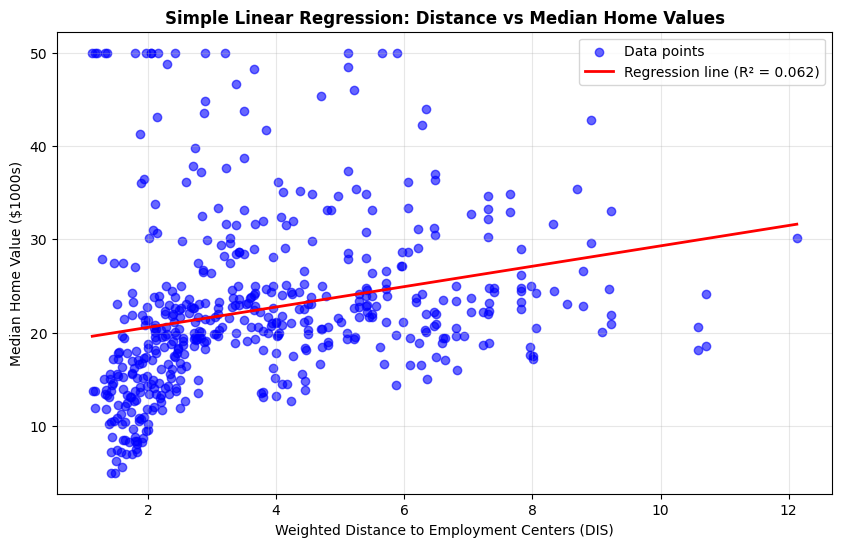

In [16]:
# Create a visualization for the regression
import numpy as np
pyplot.figure(figsize=(10, 6))
pyplot.scatter(boston_df['DIS'], boston_df['MEDV'], alpha=0.6, color='blue', label='Data points')

# Add regression line
x_range = np.linspace(boston_df['DIS'].min(), boston_df['DIS'].max(), 100)
y_pred = model.params.iloc[0] + model.params.iloc[1] * x_range
pyplot.plot(x_range, y_pred, color='red', linewidth=2, label=f'Regression line (R² = {model.rsquared:.3f})')
pyplot_title = 'Simple Linear Regression: Distance vs Median Home Values'
x_label = 'Weighted Distance to Employment Centers (DIS)'
y_label = 'Median Home Value ($1000s)'
pyplot.title(pyplot_title, fontsize=12, fontweight='bold')
pyplot.xlabel(x_label)
pyplot.ylabel(y_label)
pyplot.legend()
pyplot.grid(True, alpha=0.3)
pyplot.show()

# Conclusion
## Visualization analysis:
1. MEDV distribution shows some outliers in higher price ranges
1. Most towns are not bounded by the Charles River
1. Housing age affects property values, with patterns visible across age groups
1. Strong positive correlation between industrial activity and air pollution
1. Pupil-teacher ratios show a roughly normal distribution

## Statistical Test Results:
1. T-Test: Significant difference in home values based on Charles River proximity
1. ANOVA: Significant differences in home values across housing age groups
1. Correlation: Strong positive correlation between NOX and INDUS
1. Regression: Significant relationship between distance to employment and home values